# Finding Heavy Traffic Indicators on I-94

## Introduction
In this project, we will analyze a dataset related to westbound traffic on the I-94 Interstate highway. The dataset, made available by John Hogue through the UCI Machine Learning Repository, offers valuable insights into traffic patterns and potential causes of congestion.

### Our goal is to identify key indicators of heavy traffic, such as:

- Time of day

- Day of the week

- Weather conditions

### We will use various exploratory data visualization techniques, including:

- Line plots for time series analysis
  
- Scatter plots to explore correlations

- Bar plots and histograms for frequency distributions

  
Through this analysis, we aim to uncover trends and factors that contribute to increased traffic flow on I-94, providing a clearer understanding of when and why traffic becomes heavier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Dataset/Metro_Interstate_Traffic_Volume.csv')

Firt we examine the first and the last five rows 

In [2]:
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Analyzing Traffic Volume

<Axes: ylabel='Frequency'>

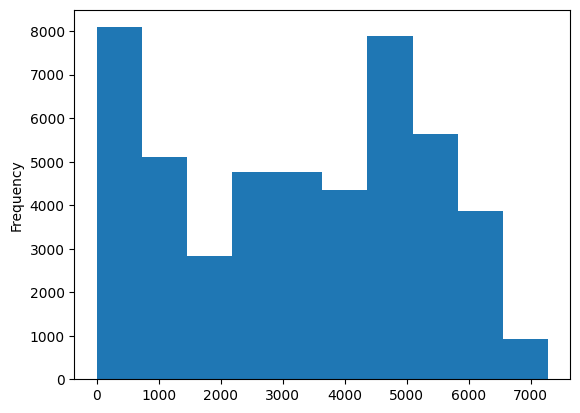

In [5]:
df['traffic_volume'].plot.hist()

In [6]:
df["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [7]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [8]:
df['date_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48204 entries, 0 to 48203
Series name: date_time
Non-Null Count  Dtype         
--------------  -----         
48204 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 376.7 KB


In [9]:
daytime = df.copy()[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
nightime = df.copy()[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7)]

In [10]:
daytime.shape


(23877, 9)

In [11]:
nightime.shape

(24327, 9)

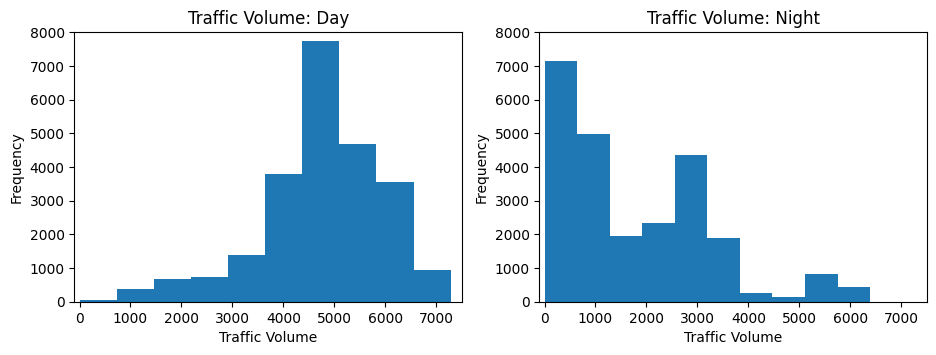

In [12]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(nightime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [13]:
daytime["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
nightime["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime traffic volume histogram is left-skewed, indicating that most values are high, with over 4,252 cars passing the station each hour 75% of the time.

In contrast, the nighttime histogram is right-skewed, showing that 75% of the time, fewer than 2,819 cars pass each hour, despite occasional peaks over 5,000.

### Time Indicators

Previously, we established that nighttime traffic is generally light. To identify indicators of heavy traffic, we will focus exclusively on daytime data moving forward.

One potential indicator is time, as traffic may vary by month, day, or hour.

We will examine several line plots to observe how traffic volume changes based on the following parameters:

- Month
  
- Day of the week

  
- Time of day

In [24]:
monthly_daytime_avg_traffic = daytime.groupby('month')['traffic_volume'].mean()


Text(0.5, 0, 'Month')

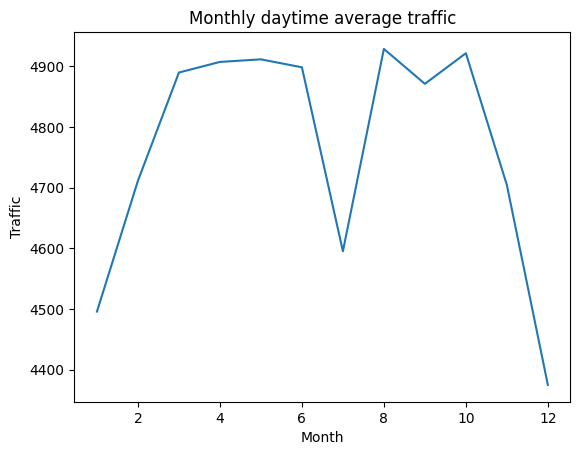

In [30]:
plt.plot(monthly_daytime_avg_traffic)
plt.title('Monthly daytime average traffic')
plt.ylabel('Traffic')
plt.xlabel('Month')

In [38]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek

In [39]:
Daily_daytime_avg_traffic = daytime.groupby('dayofweek')['traffic_volume'].mean()

Text(0.5, 0, 'Days')

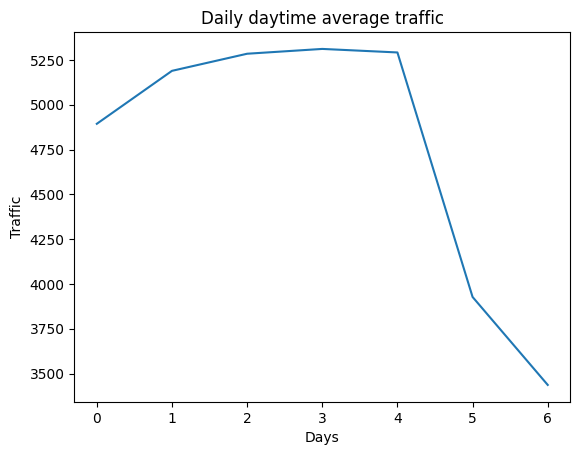

In [40]:
plt.plot(Daily_daytime_avg_traffic)
plt.title('Daily daytime average traffic')
plt.ylabel('Traffic')
plt.xlabel('Days')

In [44]:
business_days = daytime[daytime['dayofweek'] <= 4] 
weekend = daytime[daytime['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour')['traffic_volume'].mean()
by_hour_weekend = weekend.groupby('hour')['traffic_volume'].mean()

In [46]:
print("Hourly average traffic for weekdays:")
print(by_hour_business)
print("\nHourly average traffic for weekends:")
print(by_hour_weekend)

Hourly average traffic for weekdays:
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

Hourly average traffic for weekends:
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


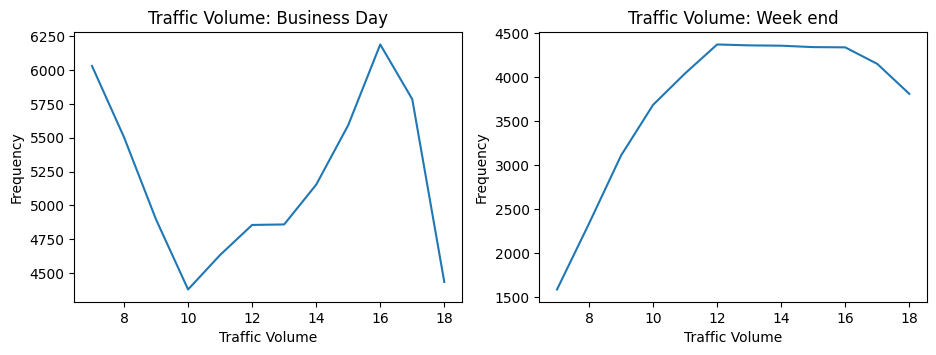

In [61]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business)
plt.title('Traffic Volume: Business Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend)
plt.title('Traffic Volume: Week end')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

The traffic volume is generally higher on weekdays compared to weekends, with peaks during rush hours around 7 AM and 4 PM, exceeding 6,000 vehicles. In summary, the indicators of heavy traffic include:

- Higher volumes during warm months (March to October) compared to cold months (November to February).
  
- Denser traffic on weekdays than on weekends.

- Rush hours around 7 AM and 4 PM on weekdays.

### Weather Indicators

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [81]:
traffic_correlation = daytime[["traffic_volume", "temp", "rain_1h", "snow_1h", "clouds_all"]].corr()["traffic_volume"]


In [82]:
traffic_correlation

traffic_volume    1.000000
temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
Name: traffic_volume, dtype: float64

The weather column that has the strongest correlation with traffic volume is 'temp,' with a Pearson coefficient of 0.13, which is relatively weak.

(230.0, 320.0)

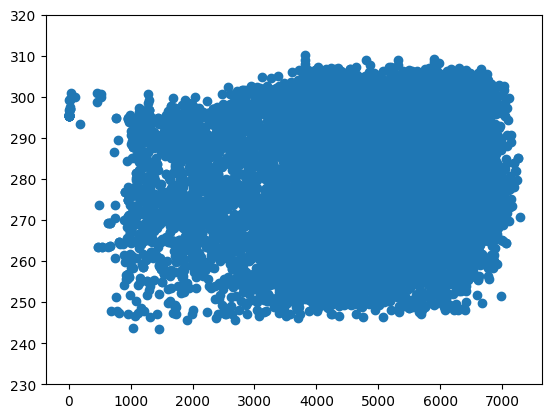

In [83]:
plt.scatter(daytime["traffic_volume"], daytime["temp"])
plt.ylim(230, 320)

we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.



### Weather Types

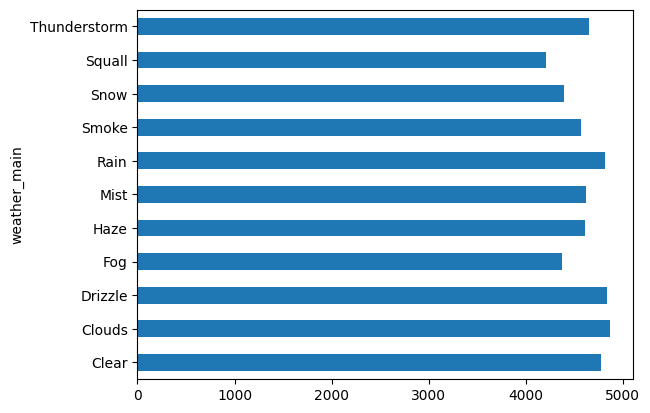

In [98]:
by_weather_main = daytime.groupby('weather_main')['traffic_volume'].mean()
by_weather_main.plot.barh()
plt.show()

<Axes: ylabel='weather_description'>

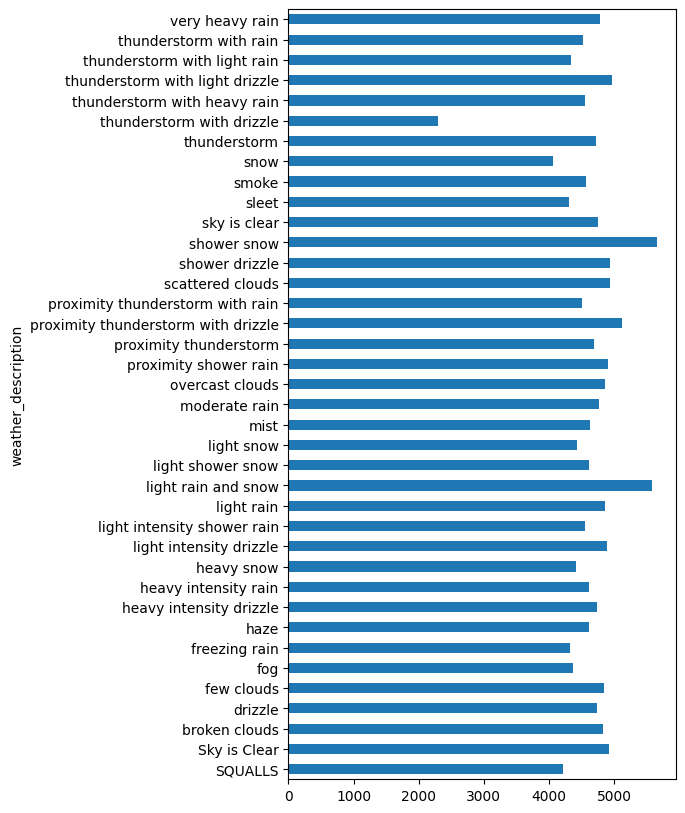

In [99]:
by_weather_description = daytime.groupby('weather_description')['traffic_volume'].mean()
by_weather_description.plot.barh(figsize=(5,10))

t looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle
  
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators

    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

    - The traffic is usually heavier on business days compared to the weekends.
        
    - On business days, the rush hours are around 7 and 16.

- Weather indicators

    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle